In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
# Assuming you have data in a CSV file (replace with your actual data source)0
col = ['Student_ID', 'Student_Name', 'Other_Unrelated_Columns','Exam_Status','Sem','Paper_Published','Final_Project_Implemented','Panel_PDF','Progress_Report_Allocated','Seminar','Year','UGC_or_Conference']
data = pd.DataFrame([],columns=col)

In [7]:
# Assuming your dataset contains a 'Year' column and 'Final_Project_Implemented' column
time_series_data = data[['Year', 'Final_Project_Implemented']].copy()

In [8]:
# Set 'Year' as the index for time-series analysis
time_series_data.set_index('Year', inplace=True)

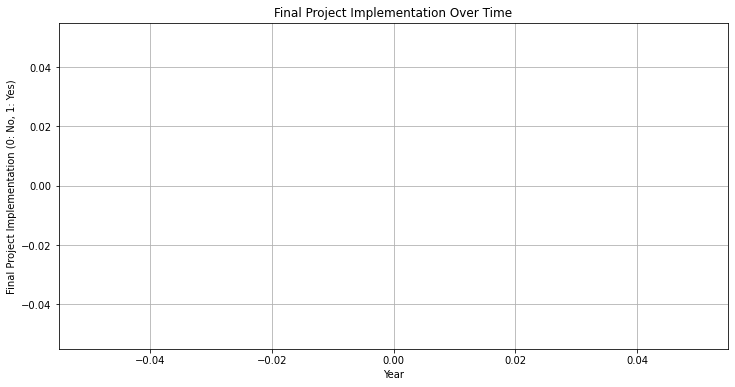

In [9]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Final_Project_Implemented'], marker='o')
plt.title('Final Project Implementation Over Time')
plt.xlabel('Year')
plt.ylabel('Final Project Implementation (0: No, 1: Yes)')
plt.grid(True)
plt.show()

In [12]:
time_series_data

,Final_Project_Implemented
Year,


In [13]:
# Decompose the time series data to analyze trends and seasonality (if any)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(time_series_data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_series_data, label='Original', marker='o')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='o')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', marker='o')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual', marker='o')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

D:\abhig\python\lib\site-packages\statsmodels\tsa\stattools.py:470: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
D:\abhig\python\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: negative dimensions are not allowed

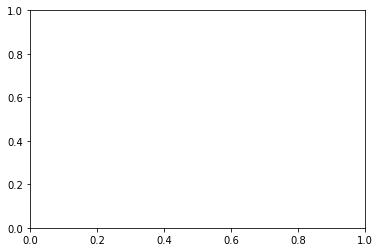

In [14]:
# Check Autocorrelation and Partial Autocorrelation plots for ARIMA order selection
plot_acf(time_series_data, lags=10)
plot_pacf(time_series_data, lags=10)
plt.show()

In [15]:
# Fit an ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(time_series_data, order=(1, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


NameError: name 'model_fit' is not defined

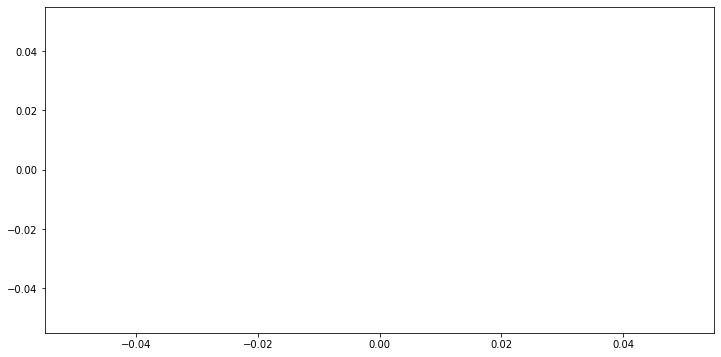

In [16]:
# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Observed', marker='o')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted', marker='o')
plt.title('ARIMA Model Fit')
plt.xlabel('Year')
plt.ylabel('Final Project Implementation (0: No, 1: Yes)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [18]:
# Make predictions for future years
forecast_years = 3  
# Adjust the number of future years to predict
forecast = model_fit.forecast(steps=forecast_years)

NameError: name 'model_fit' is not defined

In [19]:
# Print the forecasted values
forecast_df = pd.DataFrame({'Year': np.arange(time_series_data.index.max() + 1, time_series_data.index.max() + forecast_years + 1),
                            'Forecasted_Final_Project_Implemented': forecast})
forecast_df

ValueError: arange: cannot compute length

NameError: name 'forecast_df' is not defined

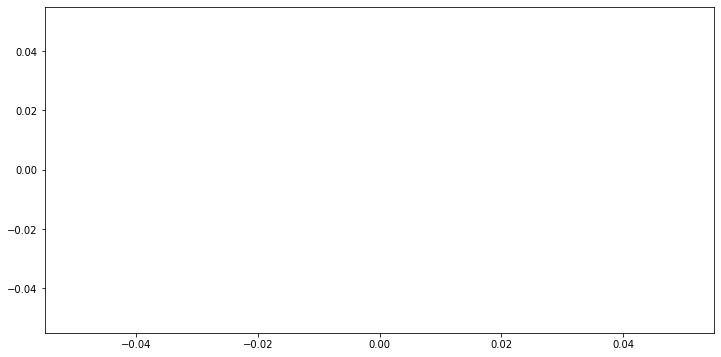

In [20]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Observed', marker='o')
plt.plot(forecast_df['Year'], forecast_df['Forecasted_Final_Project_Implemented'], color='green', label='Forecast', marker='o')
plt.title('Final Project Implementation Forecast')
plt.xlabel('Year')
plt.ylabel('Final Project Implementation (0: No, 1: Yes)')
plt.legend(loc='best')
plt.grid(True)
plt.show()